# | Barcelona "XXXX" EDA |

##### | TEAM 1 | ###
- Alfaisal Alqahtani.
- Awatef Alshehri.
- Khalid Alharthi.
- Nawaf Alhussain.
- Zahra Alali.

In [90]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#### | Loading Data |


In [79]:
population_data = pd.read_csv("data/population.csv")
population_data.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


#### | Cleaning |

In [80]:
#Renaming columns 
popul_data = population_data.rename(columns={"District.Code": "DistrictCode","District.Name": "DistrictName","Neighborhood.Code": "NeighborhoodCode", "Neighborhood.Name":"NeighborhoodName", "Number" : "Population" })
popul_data.head()

,Year,DistrictCode,DistrictName,NeighborhoodCode,NeighborhoodName,Gender,Age,Populatoin
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [81]:
def combine_age(x):
    if x == ("0-4" or "5-9"):
        return "Children"
    elif x ==("10-14" or "15-19"):
        return "Adolescence"
    elif x == ("20-24" or "25-29" or "30-34" or "35-39" or "40-44" or "45-49" or "50-54" or "55-59"):
        return "Adult"
    else:
        return "Senior"
   




In [82]:
popul_data["AgeGroup"] = popul_data['Age'].apply(combine_age)
popul_data

,Year,DistrictCode,DistrictName,NeighborhoodCode,NeighborhoodName,Gender,Age,Populatoin,AgeGroup
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224,Children
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50,Children
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43,Children
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95,Children
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124,Children
...,...,...,...,...,...,...,...,...,...
70075,2013,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Female,>=95,21,Senior
70076,2013,10,Sant Martí,70,el Besòs i el Maresme,Female,>=95,25,Senior
70077,2013,10,Sant Martí,71,Provençals del Poblenou,Female,>=95,31,Senior
70078,2013,10,Sant Martí,72,Sant Martí de Provençals,Female,>=95,38,Senior


In [83]:
popul_data.drop("Age", axis=1, inplace=True)

In [99]:
popul_data.head()

,Year,DistrictCode,DistrictName,NeighborhoodCode,NeighborhoodName,Gender,Populatoin,AgeGroup
0,2017,1,Ciutat Vella,1,el Raval,Male,224,Children
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,50,Children
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,43,Children
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,95,Children
4,2017,2,Eixample,5,el Fort Pienc,Male,124,Children


In [96]:
(popul_data.groupby("Year")["Populatoin"].sum()).to_frame().reset_index()

,Year,Populatoin
0,2013,1611822
1,2014,1602386
2,2015,1604555
3,2016,1608746
4,2017,1620809


In [120]:
pop_gender_year = (popul_data.groupby(["Year","Gender"])["Populatoin"].sum()).to_frame().reset_index()
pop_gender_year.head()


,Year,Gender,Populatoin
0,2013,Female,848121
1,2013,Male,763701
2,2014,Female,844070
3,2014,Male,758316
4,2015,Female,845035


In [100]:
(popul_data.groupby(["Year","DistrictName"])["Populatoin"].sum()).to_frame()

Populatoin
Year DistrictName                   
2013 Ciutat Vella             103339
     Eixample                 264780
     Gràcia                   120949
     Horta-Guinardó           167743
     Les Corts                 81640
     Nou Barris               165748
     Sant Andreu              146846
     Sant Martí               232826
     Sants-Montjuïc           182685
     Sarrià-Sant Gervasi      145266
2014 Ciutat Vella             100685
     Eixample                 263565
     Gràcia                   120273
     Horta-Guinardó           166950
     Les Corts                 81200
     Nou Barris               164516
     Sant Andreu              145983
     Sant Martí               232629
     Sants-Montjuïc           180824
     Sarrià-Sant Gervasi      145761
2015 Ciutat Vella             100115
     Eixample                 263558
     Gràcia                   120401
     Horta-Guinardó           166559
     Les Corts                 81530
     Nou Barris               164648
     Sant Andreu              146494
     Sant Martí               233659
     Sants-Montjuïc           180757
     Sarrià-Sant Gervasi      146834
2016 Ciutat Vella             100070
     Eixample                 264305
     Gràcia                   120918
     Horta-Guinardó           167268
     Les Corts                 81642
     Nou Barris               164881
     Sant Andreu              146731
     Sant Martí               233928
     Sants-Montjuïc           180977
     Sarrià-Sant Gervasi      148026
2017 Ciutat Vella             101387
     Eixample                 266416
     Gràcia                   121347
     Horta-Guinardó           168751
     Les Corts                 82033
     Nou Barris               166579
     Sant Andreu              147594
     Sant Martí               235513
     Sants-Montjuïc           181910
     Sarrià-Sant Gervasi      149279

In [112]:
popul_data_2013 = popul_data[popul_data.Year == 2013].reset_index()
popul_data_2014 = popul_data[popul_data.Year == 2014].reset_index()
popul_data_2015 = popul_data[popul_data.Year == 2015].reset_index()
popul_data_2016 = popul_data[popul_data.Year == 2016].reset_index()
popul_data_2017 = popul_data[popul_data.Year == 2017].reset_index()

<BarContainer object of 10 artists>

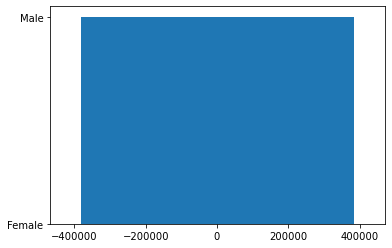

In [128]:
plt.bar(pop_gender_year["Year"], pop_gender_year["Populatoin"])


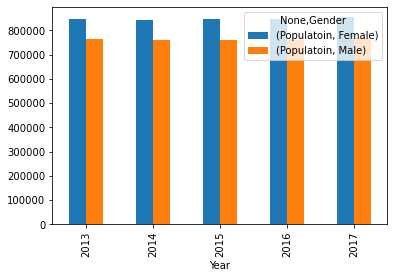

In [135]:
gender_column = pop_gender_year['Gender']
pop_gender_year.groupby(["Year", gender_column]).sum().unstack(level=1).plot(kind='bar');

